## Environment setup

### Configure your API keys

To fine-tune YOLOv12, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

In [ ]:
import os
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

### Check GPU availability

**NOTE:** **YOLOv12 leverages FlashAttention to speed up attention-based computations, but this feature requires an Nvidia GPU built on the Ampere architecture or newer—for example, GPUs like the RTX 3090, RTX 3080, or even the Nvidia L4 meet this requirement.**

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue May 13 03:45:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             47W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


### Install dependencies

**NOTE:** Currently, YOLOv12 does not have its own PyPI package, so we install it directly from GitHub while also adding roboflow (to conveniently pull datasets from the Roboflow Universe), supervision (to visualize inference results and benchmark the model’s performance), and flash-attn (to accelerate attention-based computations via optimized CUDA kernels).

In [ ]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 51.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 134.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Download example data

Let's download an image we can use for YOLOv12 inference. Feel free to drag and drop your own images into the Files tab on the left-hand side of Google Colab, then reference their filenames in your code for a custom inference demo.

In [ ]:
!wget https://media.roboflow.com/notebooks/examples/dog.jpeg

## Run inference

In the example, we're using the `yolov12l.pt` model, but you can experiment with different model sizes by simply swapping out the model name during initialization. Options include `yolov12n.pt`, `yolov12s.pt`, `yolov12m.pt`, `yolov12l.pt`, and `yolov12x.pt`.

In [ ]:
import cv2
from ultralytics import YOLO
import supervision as sv


image_path = f"{HOME}/dog.jpeg"
image = cv2.imread(image_path)

model = YOLO('yolov12l.pt')

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

ModuleNotFoundError: No module named 'ultralytics'

## Download dataset from Roboflow Universe

In [ ]:
from roboflow import download_dataset

dataset = download_dataset('XXXX', 'yolov8')

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to ScanBugM1-5 in yolov8:: 100%|██████████| 6458/6458 [00:01<00:00, 4532.66it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
#project/sbvision/1

In [ ]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


**NOTE:** We need to make a few changes to our downloaded dataset so it will work with YOLOv12. Run the following bash commands to prepare your dataset for training by updating the relative paths in the `data.yaml` file, ensuring it correctly points to the subdirectories for your dataset's `train`, `test`, and `valid` subsets.

In [ ]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [ ]:
!cat {dataset.location}/data.yaml

names:
- Arachnida
- Coleoptera
- Diptera_Brachycera
- Diptera_Nematocera
- Diptera_Syrphidae
- Hemiptera_Aphidomorpha
- Hemiptera_Heteroptera
- Hemiptera_Membracoidea
- Hymenoptera_Apocrita
- Hymenoptera_Formicidae
- Lepidotpera
- Psocodea
nc: 12
roboflow:
  license: CC BY 4.0
  project: scanbugm1
  url: https://universe.roboflow.com/computervisionlab/scanbugm1/dataset/5
  version: 5
test: ../test/images
train: ../train/images
val: ../valid/images


## Fine-tune YOLOv12 model

We are now ready to fine-tune our YOLOv12 model. In the code below, we initialize the model using a starting checkpoint—here, we use `yolov12s.yaml`, but you can replace it with any other model (e.g., `yolov12n.pt`, `yolov12m.pt`, `yolov12l.pt`, or `yolov12x.pt`) based on your preference. We set the training to run for 100 epochs in this example; however, you should adjust the number of epochs along with other hyperparameters such as batch size, image size, and augmentation settings (scale, mosaic, mixup, and copy-paste) based on your hardware capabilities and dataset size.

**Note:** **Note that after training, you might encounter a `TypeError: argument of type 'PosixPath' is not iterable error` — this is a known issue, but your model weights will still be saved, so you can safely proceed to running inference.**

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov12s.yaml')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=50, batch=2, imgsz=3200)

New https://pypi.org/project/ultralytics/8.3.133 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.yaml, data=/content/ScanBugM1-5/data.yaml, epochs=50, time=None, patience=100, batch=2, imgsz=3200, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

100%|██████████| 755k/755k [00:00<00:00, 14.2MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2, 1, 2]          
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1     37120  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2, 1, 4]        
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    677120  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.26M/5.26M [00:00<00:00, 59.5MB/s]


AMP: checks passed ✅


train: Scanning /content/ScanBugM1-5/train/labels... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:02<00:00, 1128.46it/s]

train: WARNING ⚠️ /content/ScanBugM1-5/train/images/B_LOC10_DATE1_044_png_jpg.rf.05cc954e1eabe93946881fd70af761f1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/ScanBugM1-5/train/images/B_LOC10_DATE1_044_png_jpg.rf.146ffa9bc388b71b5abceee51db069ea.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/ScanBugM1-5/train/images/B_LOC10_DATE1_044_png_jpg.rf.5397b6d6452d1169f9d4f15a15b762d5.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/ScanBugM1-5/train/images/B_LOC10_DATE1_044_png_jpg.rf.a6e45314e001ee79c738a65a29e5baf4.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/ScanBugM1-5/train/images/B_LOC10_DATE1_044_png_jpg.rf.c229715928fc44385042b6712cf527f2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/ScanBugM1-5/train/images/B_LOC10_DATE1_044_png_jpg.rf.ef7a99c9d9d169f09a3acae3e67ba1b4.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/ScanBugM1-5/train/images/B_LOC10_DATE1_044_png_jpg.rf.f3fc105fc39b1769c67a9598162a629a.jpg: 1 dup

train: New cache created: /content/ScanBugM1-5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/ScanBugM1-5/valid/labels... 124 images, 0 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<00:00, 743.64it/s]

val: WARNING ⚠️ /content/ScanBugM1-5/valid/images/DB_LOC10_DATE1_045_png_jpg.rf.15272d51caa63c80de9fd4a144a9b4b1.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/ScanBugM1-5/valid/images/DB_LOC2_DATE2_059_png_jpg.rf.1b6764059742ee6bb23d5c00a0e004af.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/ScanBugM1-5/valid/images/DB_LOC7_DATE1_021_png_jpg.rf.51103ccd6bae81ece41adc2315414ab3.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/ScanBugM1-5/valid/images/UVB_LOC6_DATE2_096_png_jpg.rf.8a58a306b33ad388255ec6816230a7aa.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/ScanBugM1-5/valid/images/UVG_LOC3_DATE1_006_png_jpg.rf.369de675e78839f9c6cfc245cc59a14e.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/ScanBugM1-5/valid/images/UVG_LOC7_DATE1_022_png_jpg.rf.8e6000386e48d7fe344ba87cf6b49359.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/ScanBugM1-5/valid/images/UVG_LOC8_DATE1_030_png_jpg.rf.17fd22eee9192e1b3c35d5465eb4933a.jpg: 1 duplicate la

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: WARNING ⚠️ TensorBoard graph visualization failure Tracing failed sanity checks!
ERROR: Graphs differed across invocations!
	Graph diff:
		  graph(%self.1 : __torch__.ultralytics.nn.tasks.DetectionModel,
		        %x.1 : Tensor):
		    %model : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="model"](%self.1)
		    %_21 : __torch__.ultralytics.nn.modules.head.Detect = prim::GetAttr[name="21"](%model)
		    %model.43 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="model"](%self.1)
		    %_20 : __torch__.ultralytics.nn.modules.block.C3k2 = prim::GetAttr[name="20"](%model.43)
		    %model.41 : __torch_

       1/50      31.3G      2.814       4.33      2.638        432       3200: 100%|██████████| 1519/1519 [08:20<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  3.09it/s]

                   all        124      10319     0.0701      0.178     0.0749     0.0311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      41.9G      2.144      2.387      1.646        184       3200: 100%|██████████| 1519/1519 [08:09<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.50it/s]

                   all        124      10319      0.615      0.184      0.117     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      38.4G      2.038      2.165       1.54         76       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.00it/s]

                   all        124      10319      0.107      0.313       0.15     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      26.6G      1.991      2.012      1.491        236       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.41it/s]

                   all        124      10319      0.476      0.264      0.214     0.0983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      34.6G      1.952      1.932      1.456        288       3200: 100%|██████████| 1519/1519 [08:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.33it/s]

                   all        124      10319      0.428      0.287      0.231     0.0958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      41.8G       1.94      1.867      1.436        374       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.46it/s]

                   all        124      10319      0.427      0.314      0.265      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      37.8G      1.906      1.799      1.423        144       3200: 100%|██████████| 1519/1519 [08:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.69it/s]

                   all        124      10319      0.546      0.349      0.311      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      26.5G      1.885      1.734      1.398        605       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.97it/s]

                   all        124      10319      0.481      0.362      0.335      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50        28G      1.864      1.683       1.38        645       3200: 100%|██████████| 1519/1519 [08:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  5.04it/s]

                   all        124      10319      0.463      0.396      0.347      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      25.7G      1.853      1.642      1.364        331       3200: 100%|██████████| 1519/1519 [08:08<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  5.05it/s]

                   all        124      10319      0.549      0.381       0.37      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        26G      1.834      1.613      1.354        516       3200: 100%|██████████| 1519/1519 [08:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  5.16it/s]

                   all        124      10319      0.513      0.406      0.406      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      36.6G       1.82      1.563       1.34        141       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  5.10it/s]

                   all        124      10319      0.553      0.424      0.416      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50        33G      1.818      1.551      1.334         60       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.17it/s]

                   all        124      10319      0.539      0.408      0.417      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        26G      1.809      1.525      1.327        298       3200: 100%|██████████| 1519/1519 [08:08<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.22it/s]

                   all        124      10319      0.537      0.434      0.427      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      26.6G      1.799      1.517      1.314        133       3200: 100%|██████████| 1519/1519 [08:08<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.34it/s]

                   all        124      10319      0.545      0.429      0.435      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      38.2G      1.787      1.483      1.305        259       3200: 100%|██████████| 1519/1519 [08:08<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.38it/s]

                   all        124      10319      0.575      0.454       0.47      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      28.7G      1.774      1.455      1.298        134       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.29it/s]

                   all        124      10319      0.582      0.453      0.471      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      41.5G      1.773      1.445        1.3         64       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.19it/s]

                   all        124      10319      0.602      0.472      0.493      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      35.3G      1.771      1.434      1.292        312       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.34it/s]

                   all        124      10319      0.616      0.479      0.503      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      25.3G      1.759      1.416      1.282        154       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.37it/s]

                   all        124      10319      0.556      0.509      0.509      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      40.6G      1.752      1.406      1.272        137       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.23it/s]

                   all        124      10319      0.577      0.509       0.52      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      39.4G       1.75      1.394      1.265         89       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.38it/s]

                   all        124      10319      0.612      0.498      0.521      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      37.5G      1.742      1.383      1.262         87       3200: 100%|██████████| 1519/1519 [08:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.39it/s]

                   all        124      10319      0.564       0.51      0.529      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      39.5G      1.741      1.373      1.256        103       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.38it/s]

                   all        124      10319      0.627      0.507      0.542      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      39.4G      1.736      1.368      1.254        607       3200: 100%|██████████| 1519/1519 [08:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.48it/s]

                   all        124      10319        0.6      0.508      0.529      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      30.7G       1.73      1.358      1.242        105       3200: 100%|██████████| 1519/1519 [08:08<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.31it/s]

                   all        124      10319      0.606      0.515       0.54      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      31.5G      1.727      1.333      1.241        159       3200: 100%|██████████| 1519/1519 [08:08<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.35it/s]

                   all        124      10319      0.597      0.524      0.554      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      28.7G      1.725      1.336      1.239        150       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.29it/s]

                   all        124      10319      0.576      0.547      0.563      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      37.9G      1.715       1.31      1.236        245       3200: 100%|██████████| 1519/1519 [08:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.47it/s]

                   all        124      10319      0.574      0.558      0.566      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      25.1G      1.716      1.313       1.23         75       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.37it/s]

                   all        124      10319      0.572      0.556      0.566      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      32.9G      1.714      1.311      1.225        152       3200: 100%|██████████| 1519/1519 [08:08<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.37it/s]

                   all        124      10319      0.594      0.551       0.57      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      40.8G      1.698      1.283       1.22        614       3200: 100%|██████████| 1519/1519 [08:08<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.51it/s]

                   all        124      10319      0.591       0.59      0.582      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      26.7G      1.699      1.278      1.217        211       3200: 100%|██████████| 1519/1519 [08:09<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.55it/s]

                   all        124      10319       0.61      0.548       0.57      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      30.7G       1.69      1.283      1.214        240       3200: 100%|██████████| 1519/1519 [08:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.53it/s]

                   all        124      10319      0.588      0.589      0.588      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      31.5G      1.691      1.269      1.212        259       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.55it/s]

                   all        124      10319      0.612      0.588      0.597      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      32.8G      1.691      1.265      1.215        119       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.53it/s]

                   all        124      10319      0.616      0.575      0.595      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      41.4G      1.688      1.247      1.212        108       3200: 100%|██████████| 1519/1519 [08:08<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.49it/s]

                   all        124      10319      0.615      0.564      0.598      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      32.1G      1.682      1.251      1.206         93       3200: 100%|██████████| 1519/1519 [08:08<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.58it/s]

                   all        124      10319      0.614      0.604      0.609      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      40.5G      1.675       1.24      1.203        570       3200: 100%|██████████| 1519/1519 [08:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.57it/s]

                   all        124      10319      0.615      0.596      0.606      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      27.7G       1.67      1.231      1.204        126       3200: 100%|██████████| 1519/1519 [08:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.61it/s]

                   all        124      10319      0.616      0.595      0.602      0.343


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      34.3G      1.633      1.216      1.203        130       3200: 100%|██████████| 1519/1519 [07:54<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.44it/s]

                   all        124      10319      0.605      0.593      0.604      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      27.9G       1.63      1.208      1.197         30       3200: 100%|██████████| 1519/1519 [07:54<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.55it/s]

                   all        124      10319      0.601      0.607      0.613      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        40G      1.624      1.199        1.2         95       3200: 100%|██████████| 1519/1519 [07:54<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.34it/s]

                   all        124      10319      0.632      0.606      0.619      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      37.9G      1.625      1.191      1.194         62       3200: 100%|██████████| 1519/1519 [07:54<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.30it/s]

                   all        124      10319      0.633      0.606      0.618      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      26.6G      1.614      1.181      1.193        208       3200: 100%|██████████| 1519/1519 [07:54<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.59it/s]

                   all        124      10319      0.627      0.607       0.62      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      30.2G      1.618      1.182      1.193         48       3200: 100%|██████████| 1519/1519 [07:54<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.58it/s]

                   all        124      10319      0.632       0.61      0.624      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50        36G      1.613      1.173       1.19         60       3200: 100%|██████████| 1519/1519 [07:54<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.33it/s]

                   all        124      10319      0.647      0.596      0.624       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      31.4G      1.603      1.165      1.183        115       3200: 100%|██████████| 1519/1519 [07:54<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.59it/s]

                   all        124      10319      0.648      0.609      0.627      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      36.3G      1.599      1.161      1.183        224       3200: 100%|██████████| 1519/1519 [07:54<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.36it/s]

                   all        124      10319       0.65      0.609       0.63      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      34.2G      1.599      1.155       1.18         41       3200: 100%|██████████| 1519/1519 [07:53<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.62it/s]

                   all        124      10319      0.654      0.609      0.633      0.368



50 epochs completed in 6.840 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv12s summary (fused): 376 layers, 9,078,852 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.96it/s]


                   all        124      10319      0.663      0.603      0.634      0.368
             Arachnida         79        187      0.512      0.343       0.39      0.233
            Coleoptera         88        273      0.668      0.561      0.611      0.366
    Diptera_Brachycera        124       4817      0.816       0.81      0.869      0.532
    Diptera_Nematocera        123       2202      0.642      0.685      0.676      0.345
     Diptera_Syrphidae         41        225      0.737      0.849      0.867      0.647
Hemiptera_Aphidomorpha         87        296      0.597      0.473        0.5      0.266
 Hemiptera_Heteroptera         64        184       0.67      0.462      0.527      0.285
Hemiptera_Membracoidea         77        408      0.684      0.749      0.755      0.394
  Hymenoptera_Apocrita        119       1113      0.553      0.481      0.534       0.32
Hymenoptera_Formicidae         17        413      0.691      0.763      0.713      0.385
           Lepidotper

## Evaluate fine-tuned YOLOv12 model

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml					   train_batch1.jpg
confusion_matrix_normalized.png			   train_batch2.jpg
confusion_matrix.png				   train_batch60760.jpg
events.out.tfevents.1747108084.9bb8144da2da.399.0  train_batch60761.jpg
F1_curve.png					   train_batch60762.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
P_curve.png					   val_batch1_labels.jpg
PR_curve.png					   val_batch1_pred.jpg
R_curve.png					   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


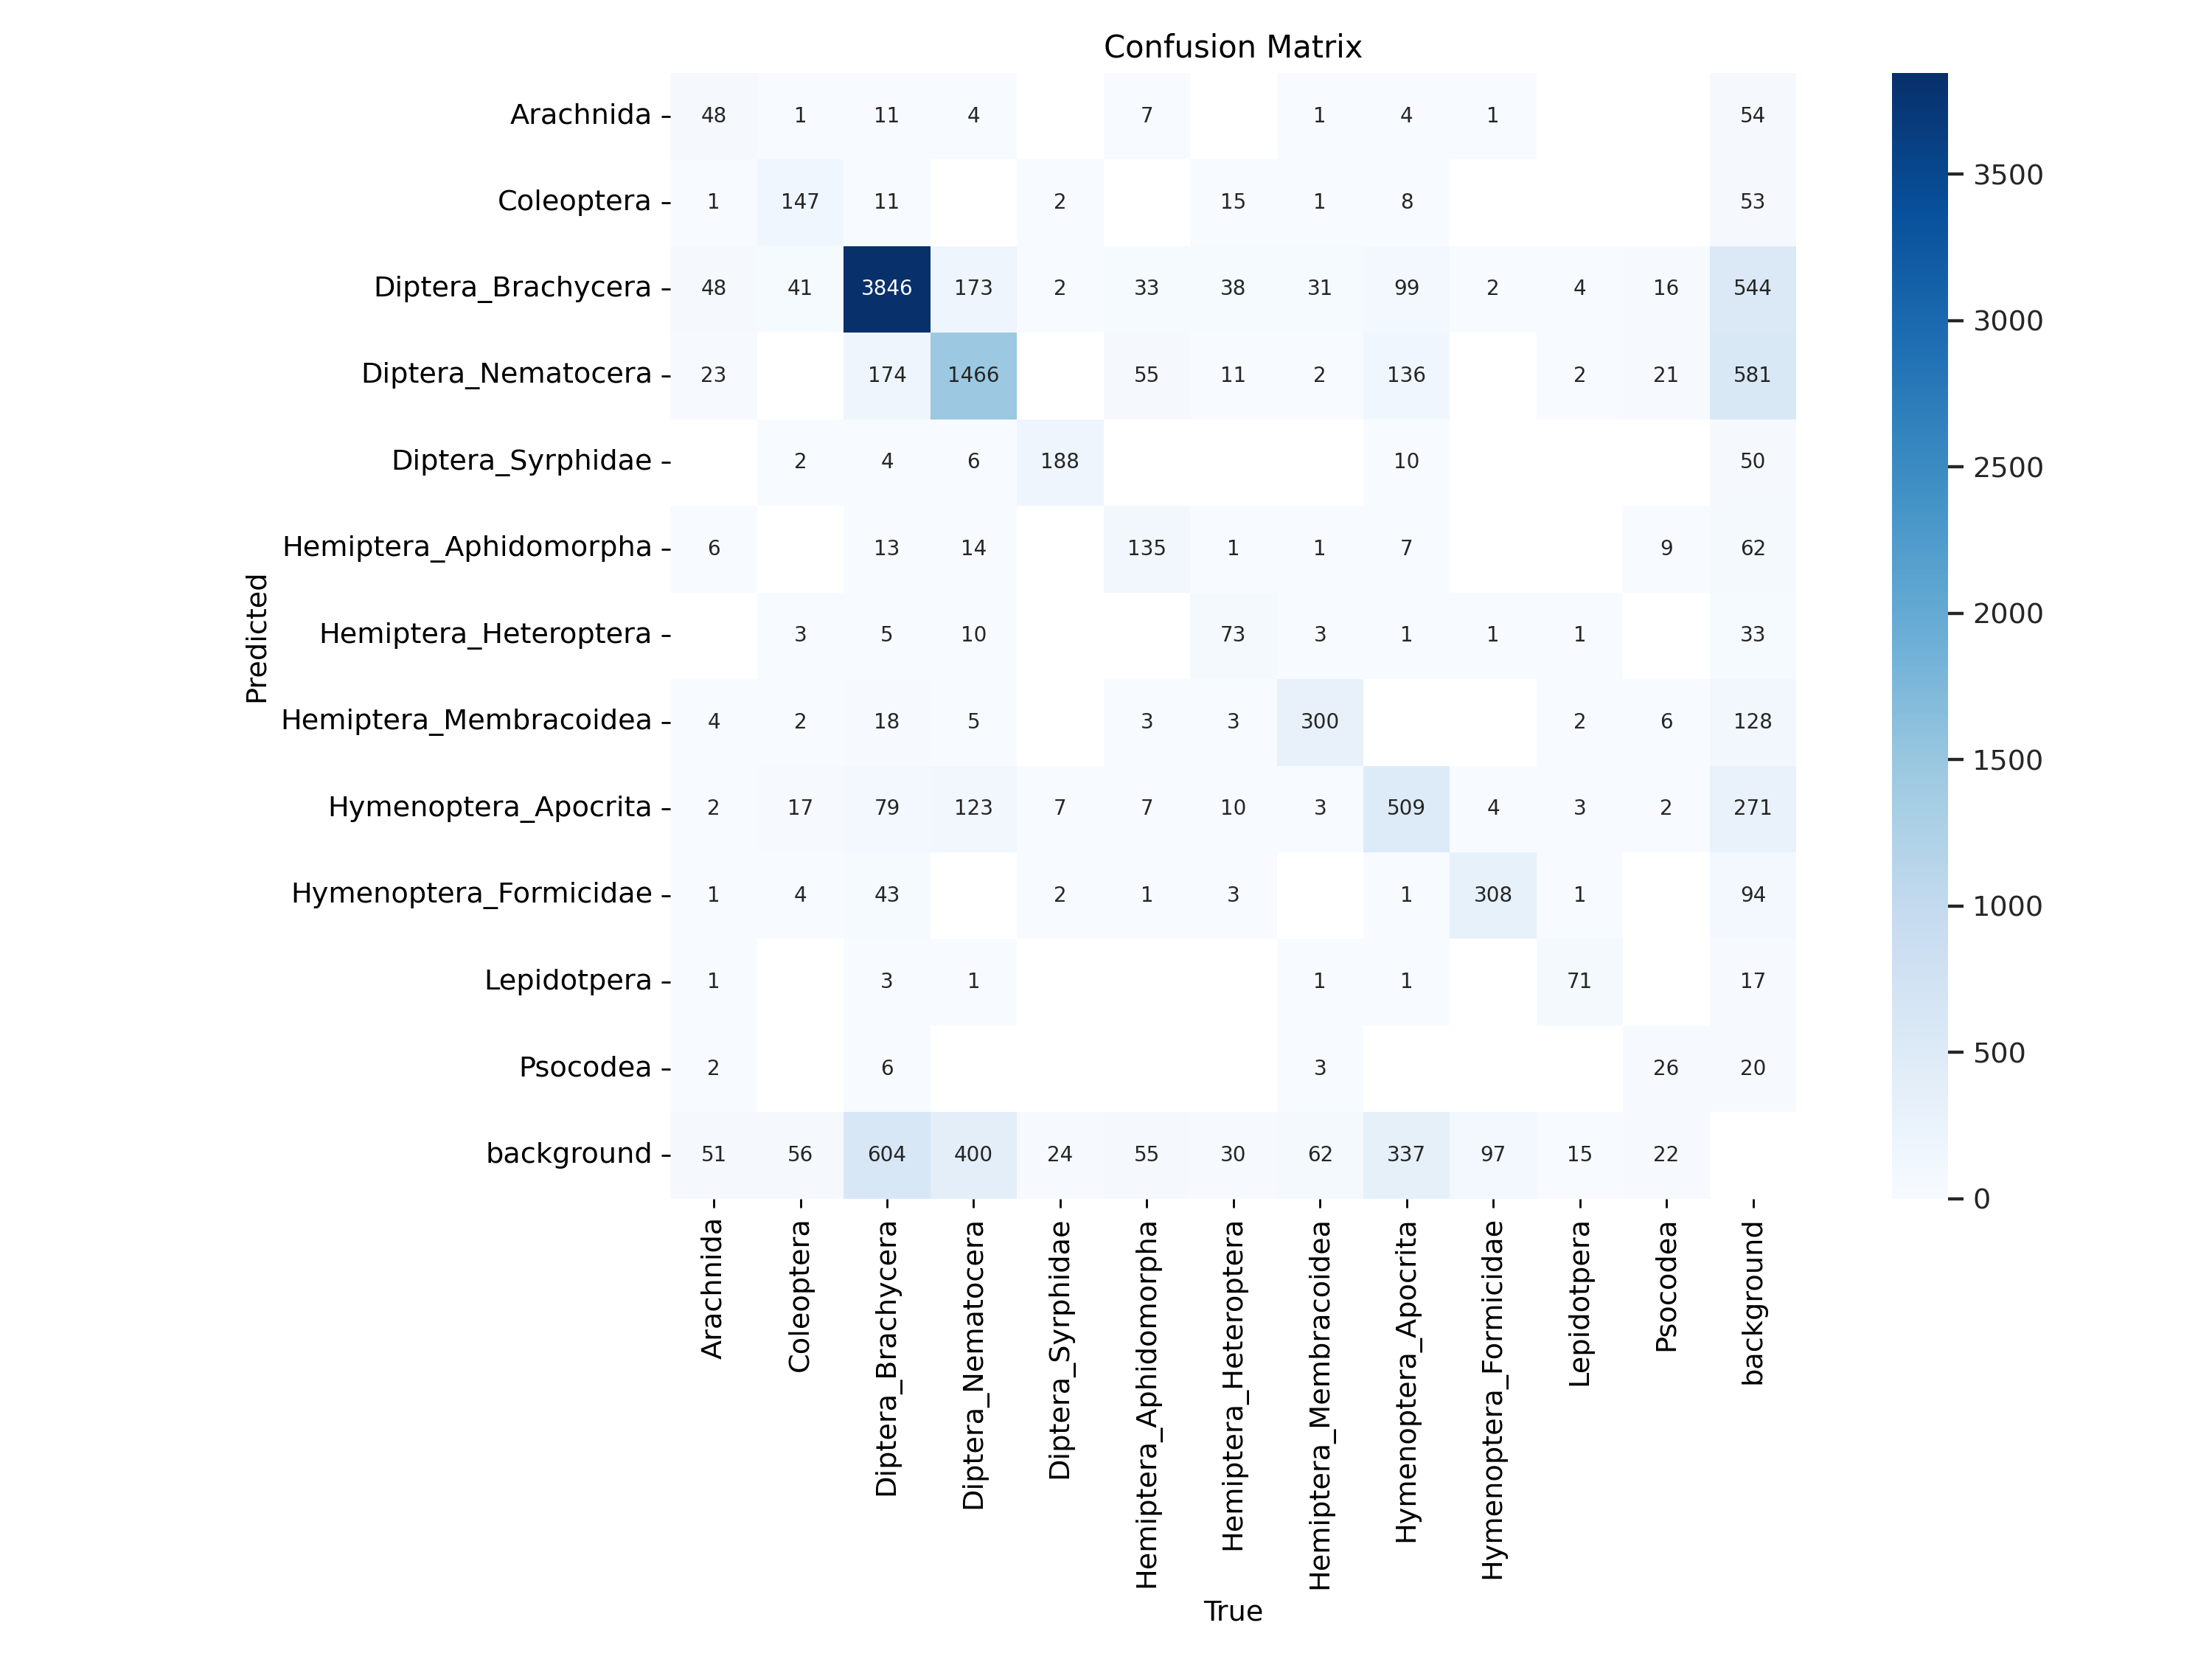

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

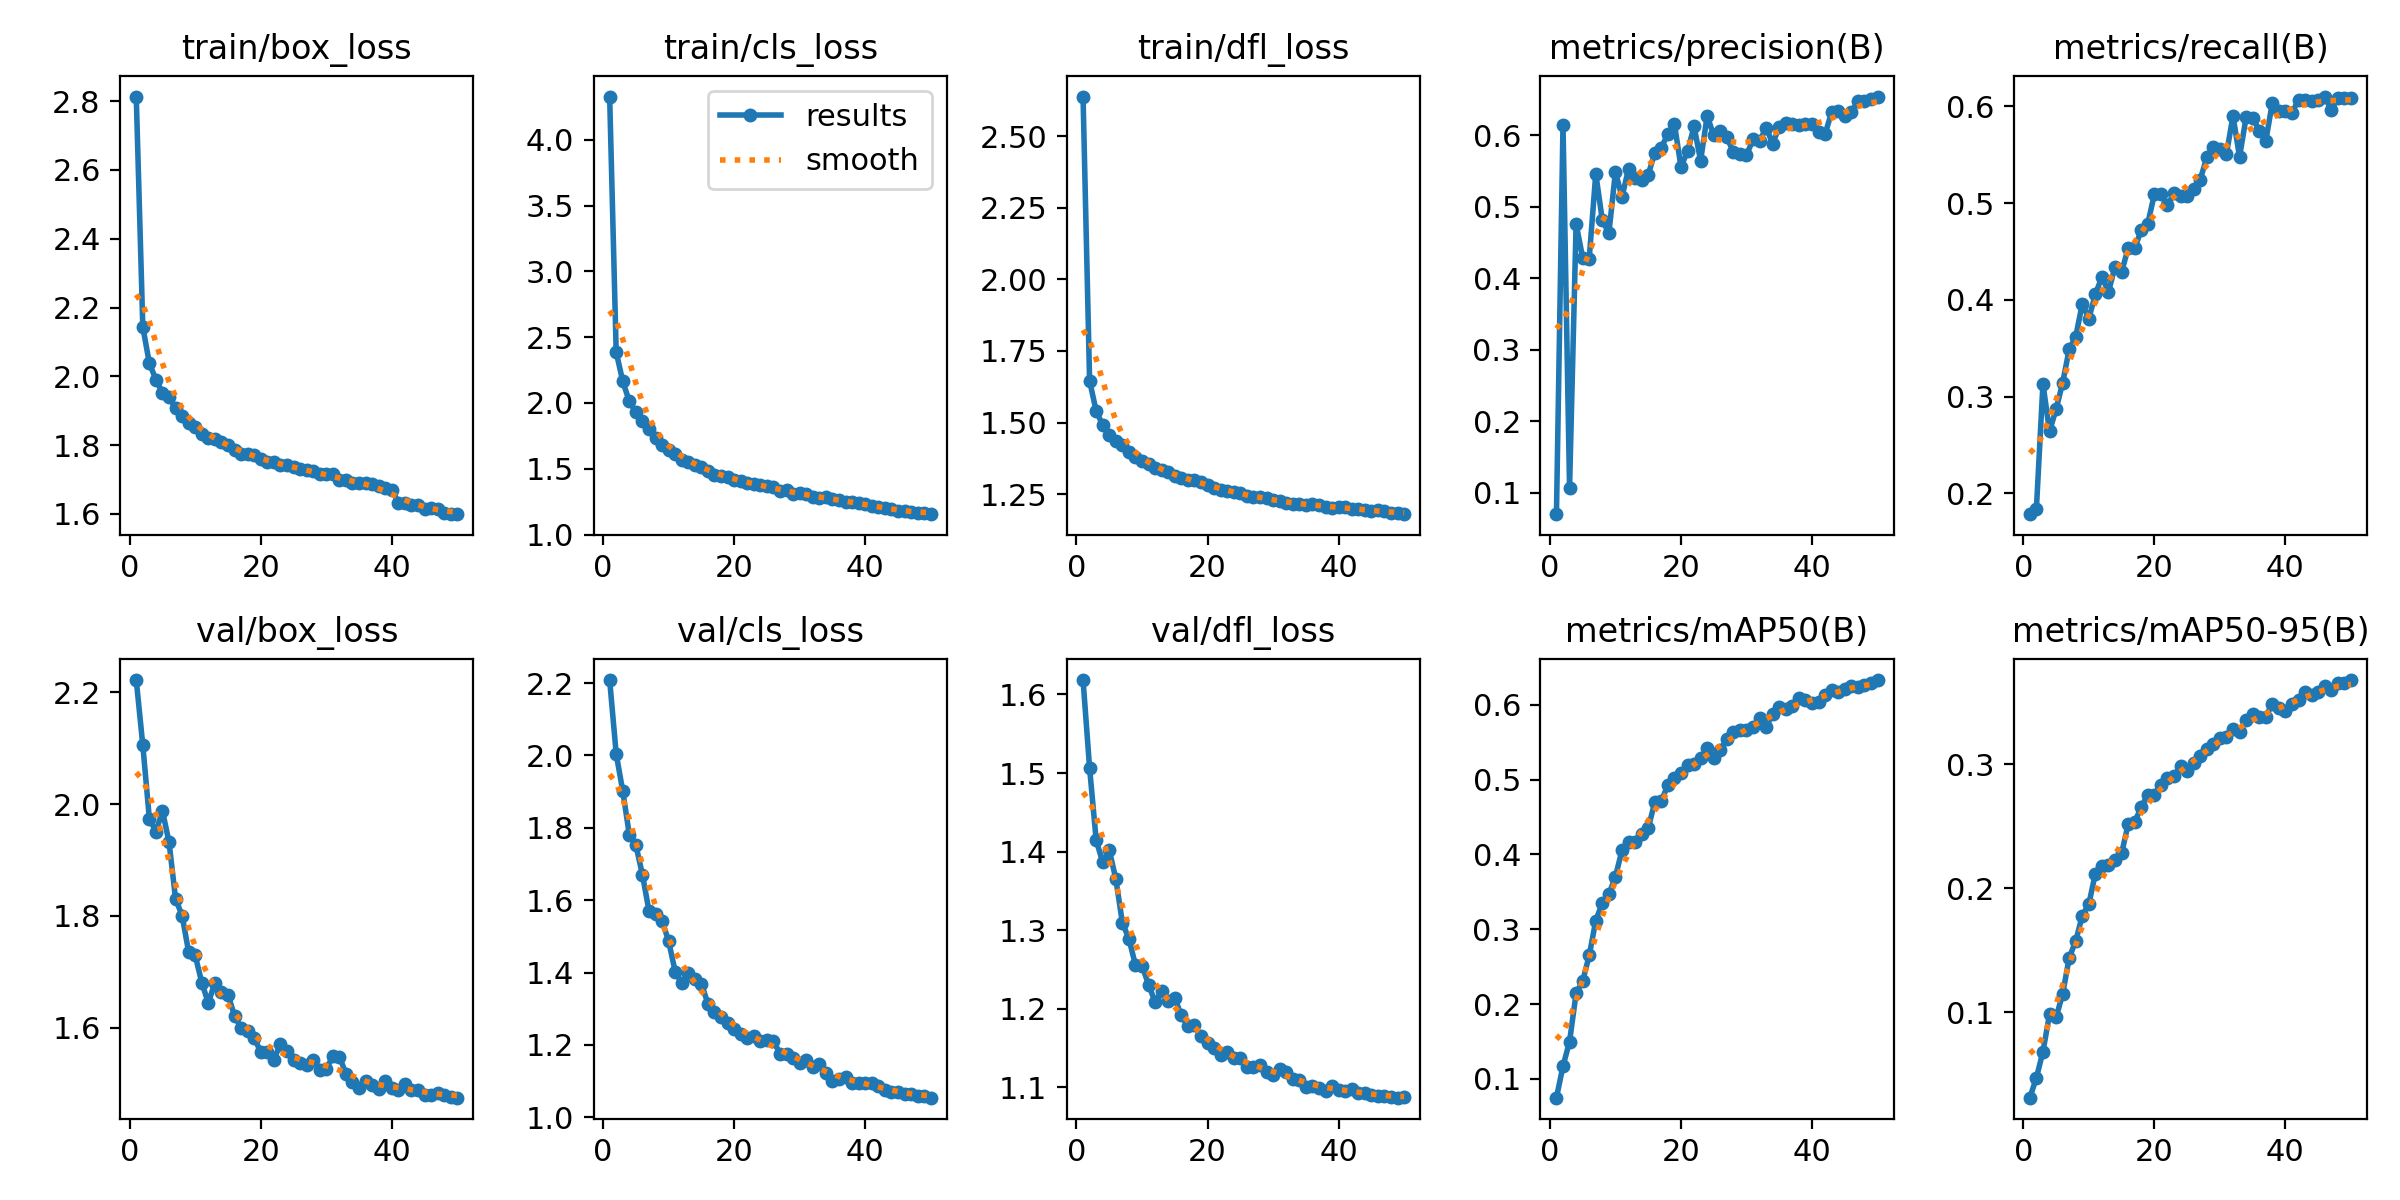

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['Arachnida',
 'Coleoptera',
 'Diptera_Brachycera',
 'Diptera_Nematocera',
 'Diptera_Syrphidae',
 'Hemiptera_Aphidomorpha',
 'Hemiptera_Heteroptera',
 'Hemiptera_Membracoidea',
 'Hymenoptera_Apocrita',
 'Hymenoptera_Formicidae',
 'Lepidotpera',
 'Psocodea']

In [ ]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [ ]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.2968819619978403
mAP 50 0.4989182037280862
mAP 75 0.3134842150100487


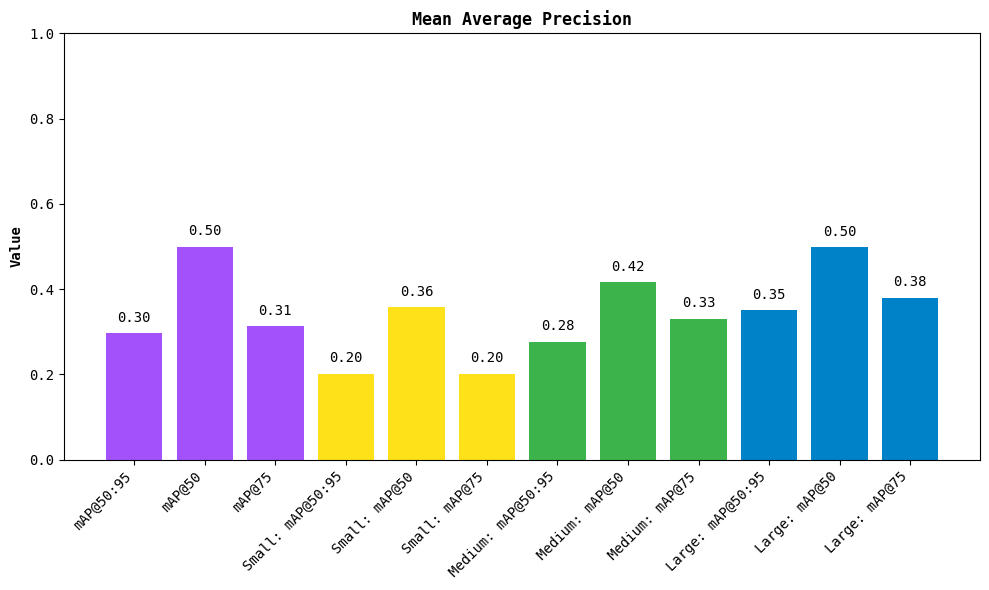

In [ ]:
map.plot()

## Run inference with fine-tuned YOLOv12 model

In [ ]:
import supervision as sv

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

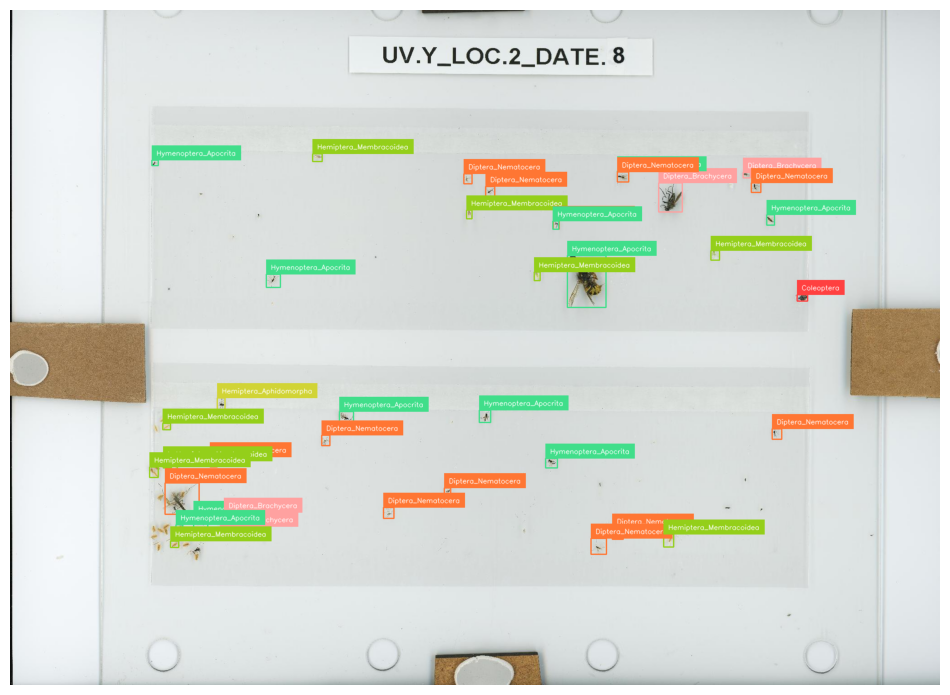

In [ ]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
from google.colab import userdata
from roboflow import Roboflow
rf = Roboflow(api_key="q5dx0cWktqaKU3A8SD6P")

workspace = rf.workspace("computervisionlab")
project = workspace.project("scanbugm1")
version = project.version(5)

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
project.version(dataset.version).deploy(model_type="yolov12", model_path=f"{HOME}/runs/detect/train/")


!!! ATTENTION !!!
Model must be trained and uploaded using ultralytics from https://github.com/sunsmarterjie/yolov12
or through the Roboflow platform
!!! ATTENTION !!!

View the status of your deployment at: https://app.roboflow.com/computervisionlab/scanbugm1/5
Share your model with the world at: https://universe.roboflow.com/computervisionlab/scanbugm1/model/5
